<a href="https://colab.research.google.com/github/gillopy/Quant/blob/main/momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4257926580.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01")
[*********************100%***********************]  1 of 1 completed


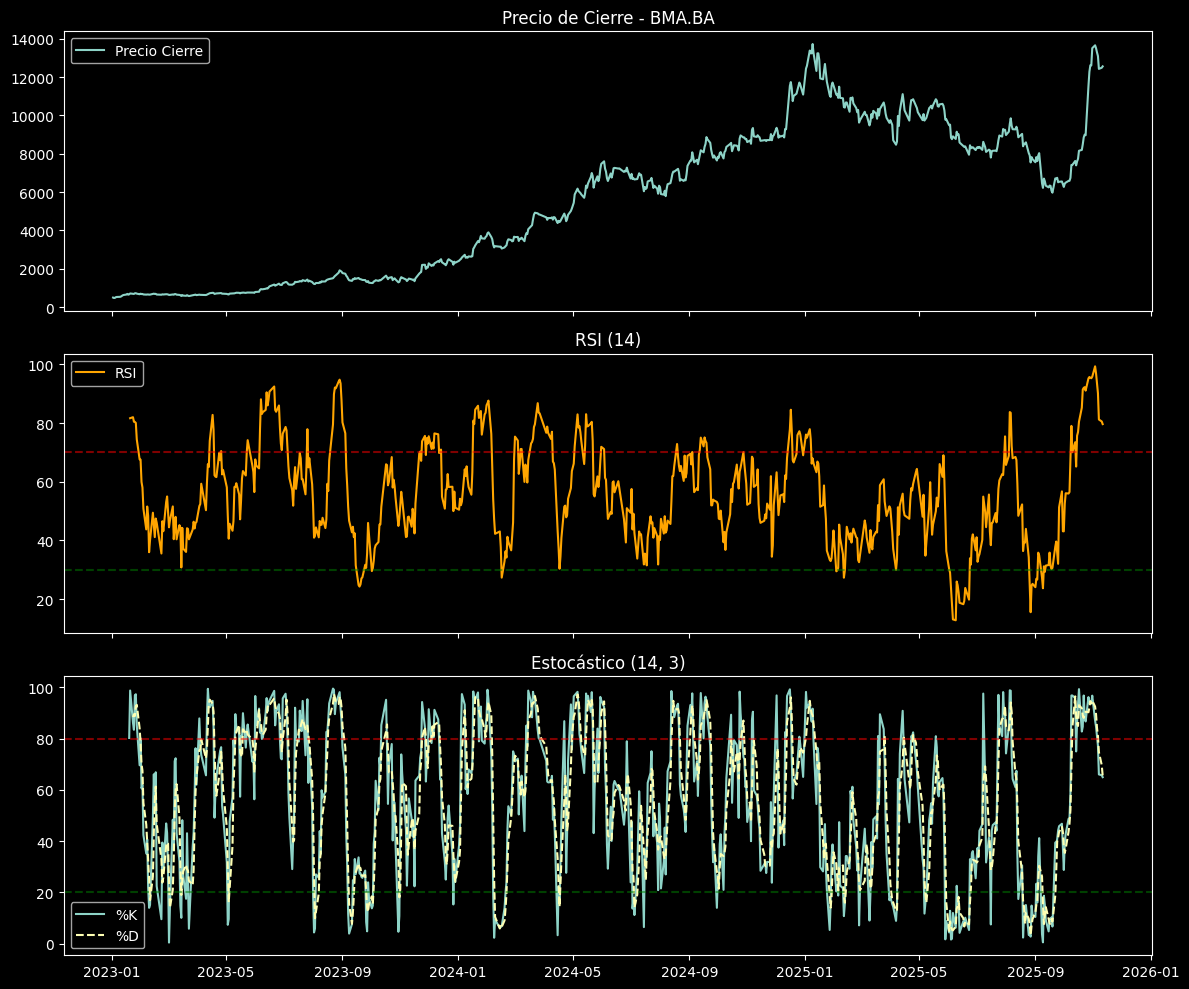

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
ticker = "BMA.BA"  # Podés cambiar por AAPL, TSLA, etc.
df = yf.download(ticker, start="2023-01-01")

# =======================
# CÁLCULO DEL RSI (14 días)
# =======================
def calcular_rsi(series, periodo=14):
    delta = series.diff()
    ganancia = delta.clip(lower=0)
    perdida = -delta.clip(upper=0)

    media_ganancia = ganancia.rolling(periodo).mean()
    media_perdida = perdida.rolling(periodo).mean()

    rs = media_ganancia / media_perdida
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calcular_rsi(df['Close'])

# =======================
# CÁLCULO DEL ESTOCÁSTICO (14 días)
# =======================
def calcular_estocastico(df, k_period=14, d_period=3):
    low_min = df['Low'].rolling(k_period).min()
    high_max = df['High'].rolling(k_period).max()
    df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
    df['%D'] = df['%K'].rolling(d_period).mean()
    return df

df = calcular_estocastico(df)

# =======================
# GRÁFICOS
# =======================
plt.style.use('dark_background')

# Gráfico de precios + RSI + Estocástico
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Precio
axs[0].plot(df.index, df['Close'], label='Precio Cierre')
axs[0].set_title(f'Precio de Cierre - {ticker}')
axs[0].legend()

# RSI
axs[1].plot(df.index, df['RSI'], label='RSI', color='orange')
axs[1].axhline(70, color='red', linestyle='--', alpha=0.5)
axs[1].axhline(30, color='green', linestyle='--', alpha=0.5)
axs[1].set_title('RSI (14)')
axs[1].legend()

# Estocástico
axs[2].plot(df.index, df['%K'], label='%K')
axs[2].plot(df.index, df['%D'], label='%D', linestyle='--')
axs[2].axhline(80, color='red', linestyle='--', alpha=0.5)
axs[2].axhline(20, color='green', linestyle='--', alpha=0.5)
axs[2].set_title('Estocástico (14, 3)')
axs[2].legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-308414561.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01")
[*********************100%***********************]  1 of 1 completed


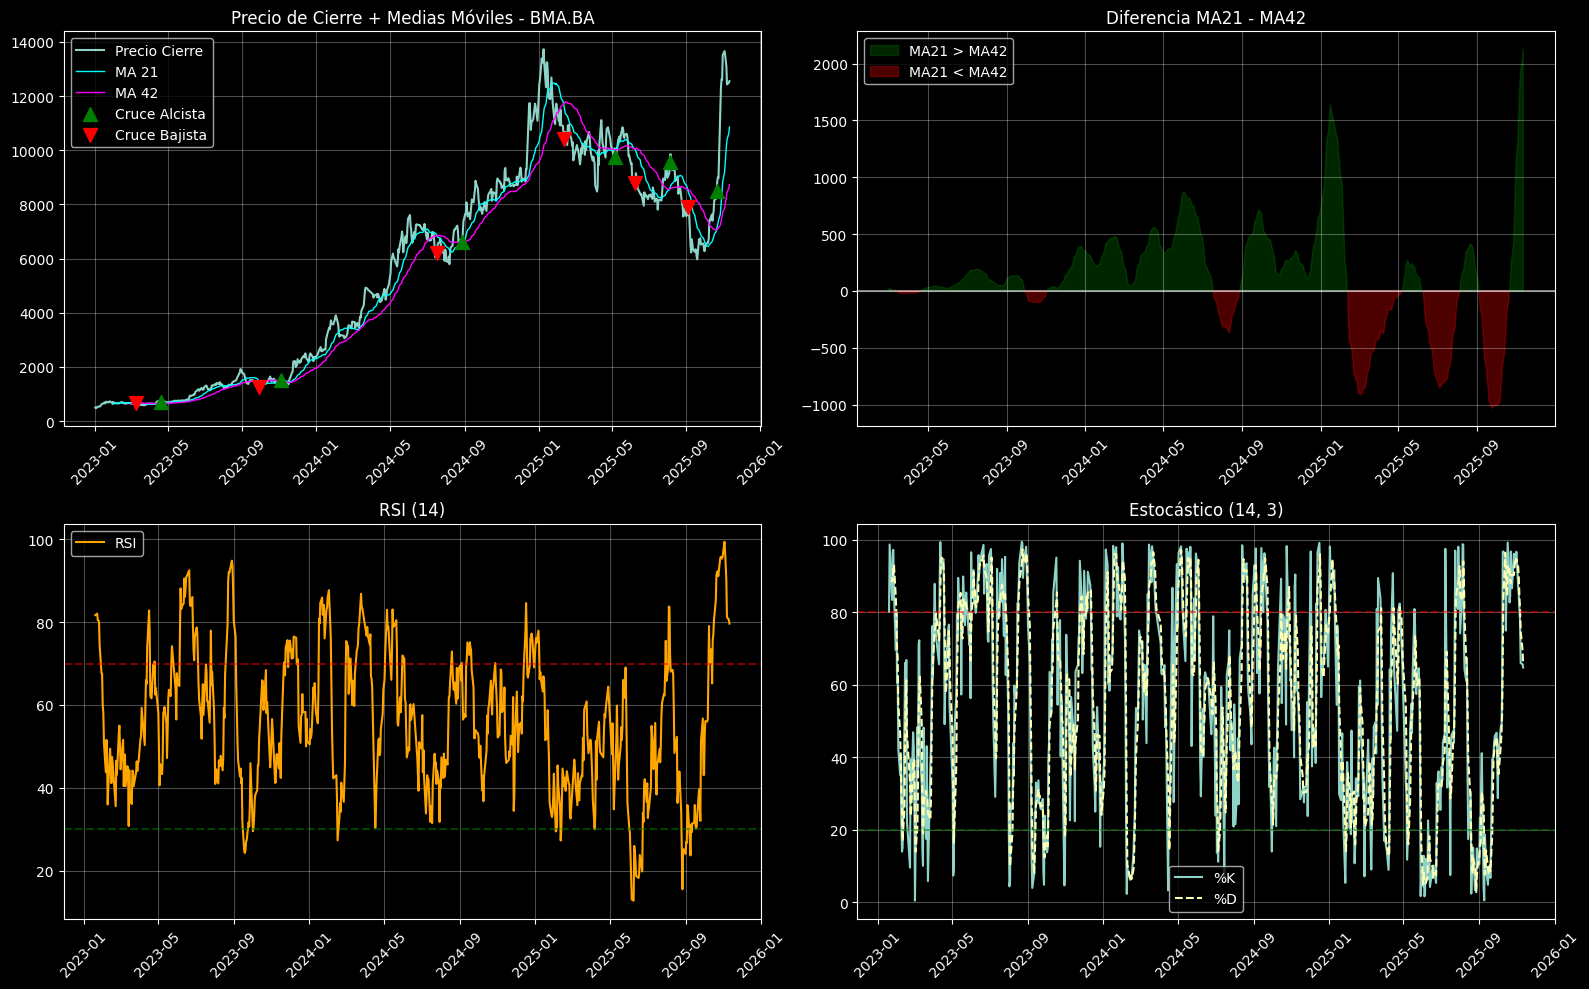


=== RESUMEN DE CRUCES DE MEDIAS MÓVILES (BMA.BA) ===
Cruces alcistas detectados: 6
Cruces bajistas detectados: 6


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
ticker = "BMA.BA"  # Podés cambiar por AAPL, TSLA, etc.
df = yf.download(ticker, start="2023-01-01")

# =======================
# CÁLCULO DEL RSI (14 días)
# =======================
def calcular_rsi(series, periodo=14):
    delta = series.diff()
    ganancia = delta.clip(lower=0)
    perdida = -delta.clip(upper=0)

    media_ganancia = ganancia.rolling(periodo).mean()
    media_perdida = perdida.rolling(periodo).mean()

    rs = media_ganancia / media_perdida
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calcular_rsi(df['Close'])

# =======================
# CÁLCULO DEL ESTOCÁSTICO (14 días)
# =======================
def calcular_estocastico(df, k_period=14, d_period=3):
    low_min = df['Low'].rolling(k_period).min()
    high_max = df['High'].rolling(k_period).max()
    df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
    df['%D'] = df['%K'].rolling(d_period).mean()
    return df

df = calcular_estocastico(df)

# =======================
# CÁLCULO DE MEDIAS MÓVILES
# =======================
df['MA_21'] = df['Close'].rolling(21).mean()
df['MA_42'] = df['Close'].rolling(42).mean()

# Detectar cruces de medias móviles
df['MA_21_prev'] = df['MA_21'].shift(1)
df['MA_42_prev'] = df['MA_42'].shift(1)

# Cruce alcista: MA21 cruza por encima de MA42
df['cruce_alcista'] = (df['MA_21'] > df['MA_42']) & (df['MA_21_prev'] <= df['MA_42_prev'])

# Cruce bajista: MA21 cruza por debajo de MA42
df['cruce_bajista'] = (df['MA_21'] < df['MA_42']) & (df['MA_21_prev'] >= df['MA_42_prev'])

# =======================
# GRÁFICOS
# =======================
plt.style.use('dark_background')

# Crear grilla de 2x2
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Precio + Medias Móviles (superior izquierda)
axs[0, 0].plot(df.index, df['Close'], label='Precio Cierre', linewidth=1.5)
axs[0, 0].plot(df.index, df['MA_21'], label='MA 21', color='cyan', linewidth=1)
axs[0, 0].plot(df.index, df['MA_42'], label='MA 42', color='magenta', linewidth=1)

# Marcar cruces
cruces_alcistas = df[df['cruce_alcista']]
cruces_bajistas = df[df['cruce_bajista']]

if not cruces_alcistas.empty:
    axs[0, 0].scatter(cruces_alcistas.index, cruces_alcistas['Close'],
                      color='green', marker='^', s=100, label='Cruce Alcista', zorder=5)

if not cruces_bajistas.empty:
    axs[0, 0].scatter(cruces_bajistas.index, cruces_bajistas['Close'],
                      color='red', marker='v', s=100, label='Cruce Bajista', zorder=5)

axs[0, 0].set_title(f'Precio de Cierre + Medias Móviles - {ticker}')
axs[0, 0].legend()
axs[0, 0].grid(True, alpha=0.3)

# Diferencia entre medias (superior derecha)
diferencia_ma = df['MA_21'] - df['MA_42']
axs[0, 1].fill_between(df.index, diferencia_ma, 0,
                       where=(diferencia_ma >= 0), color='green', alpha=0.3, label='MA21 > MA42')
axs[0, 1].fill_between(df.index, diferencia_ma, 0,
                       where=(diferencia_ma < 0), color='red', alpha=0.3, label='MA21 < MA42')
axs[0, 1].axhline(0, color='white', linestyle='-', alpha=0.5)
axs[0, 1].set_title('Diferencia MA21 - MA42')
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

# RSI (inferior izquierda)
axs[1, 0].plot(df.index, df['RSI'], label='RSI', color='orange')
axs[1, 0].axhline(70, color='red', linestyle='--', alpha=0.5)
axs[1, 0].axhline(30, color='green', linestyle='--', alpha=0.5)
axs[1, 0].set_title('RSI (14)')
axs[1, 0].legend()
axs[1, 0].grid(True, alpha=0.3)

# Estocástico (inferior derecha)
axs[1, 1].plot(df.index, df['%K'], label='%K')
axs[1, 1].plot(df.index, df['%D'], label='%D', linestyle='--')
axs[1, 1].axhline(80, color='red', linestyle='--', alpha=0.5)
axs[1, 1].axhline(20, color='green', linestyle='--', alpha=0.5)
axs[1, 1].set_title('Estocástico (14, 3)')
axs[1, 1].legend()
axs[1, 1].grid(True, alpha=0.3)

# Rotar etiquetas del eje x para mejor legibilidad
for i in range(2):
    for j in range(2):
        axs[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# =======================
# RESUMEN DE CRUCES
# =======================
print(f"\n=== RESUMEN DE CRUCES DE MEDIAS MÓVILES ({ticker}) ===")
print(f"Cruces alcistas detectados: {df['cruce_alcista'].sum()}")
print(f"Cruces bajistas detectados: {df['cruce_bajista'].sum()}")

